In [5]:
import sys,glob,os,pickle
import numpy as np
from netCDF4 import Dataset,netcdftime,num2date
import pandas as pd
import matplotlib.pylab as plt

sys.path.append('/Users/peterpfleiderer/Documents/Projects/country_analysis/country_analysis_scripts/')
try:del sys.modules['country_analysis'] 
except:pass
from country_analysis import country_analysis

GHA=country_analysis('GHA','/Users/peterpfleiderer/Documents/Projects/country_analysis/')

In [6]:
################
# create/load masks for CMIP5 (360x720 grid)
################
file_name='/Users/peterpfleiderer/Documents/data/raw/SPEI/CMIP5/spei_hadgem2-es_rcp2.6_1950-2099_1m.nc'
shape_file='/Users/peterpfleiderer/Documents/masks/shapefiles/world/ne_50m_admin_0_countries'
# without population weighting
GHA.create_mask(file_name=file_name,var_name='SPEI',shape_file=shape_file)

# population weighting
pop_mask_file='/Users/peterpfleiderer/Documents/masks/population/population_1990_incrLat.nc'
GHA.create_mask(file_name=file_name,var_name='SPEI',shape_file=shape_file,mask_style='pop1990_weighted',pop_mask_file=pop_mask_file)
pop_mask_file='/Users/peterpfleiderer/Documents/masks/population/population_2015_incrLat.nc'
GHA.create_mask(file_name=file_name,var_name='SPEI',shape_file=shape_file,mask_style='pop2015_weighted',pop_mask_file=pop_mask_file)


In [7]:
################
# create/load masks for NCEP (94x192 grid)
################
file_name='/Users/peterpfleiderer/Documents/data/raw/SPEI/NCEP/SPEI_ncep_1948-2014_1m.nc'
shape_file='/Users/peterpfleiderer/Documents/masks/shapefiles/world/ne_50m_admin_0_countries'
# without population weighting
GHA.create_mask(file_name=file_name,var_name='SPEI',shape_file=shape_file)

# population weighting
pop_mask_file='/Users/peterpfleiderer/Documents/masks/population/population_1990_incrLat.nc'
GHA.create_mask(file_name=file_name,var_name='SPEI',shape_file=shape_file,mask_style='pop1990_weighted',pop_mask_file=pop_mask_file)
pop_mask_file='/Users/peterpfleiderer/Documents/masks/population/population_2015_incrLat.nc'
GHA.create_mask(file_name=file_name,var_name='SPEI',shape_file=shape_file,mask_style='pop2015_weighted',pop_mask_file=pop_mask_file)


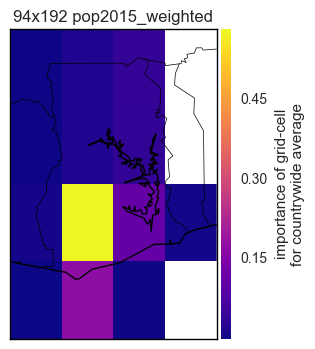

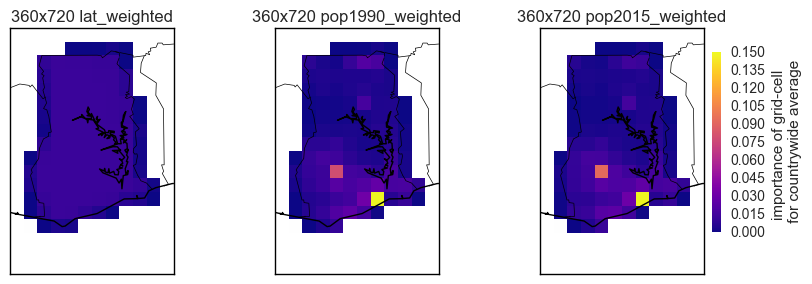

In [32]:
###############
# show masks
###############

# standard plot
GHA.plot_map(meta_data=['94x192','pop2015_weighted'],source='_masks',limits=[-4,2,3,12])

# custom plots
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(8,3))
GHA.plot_map(meta_data=['360x720','lat_weighted'],source='_masks',limits=[-4,2,3,12],ax=axes[0],show=False,color_bar=False,color_range=[0,0.15])
GHA.plot_map(meta_data=['360x720','pop1990_weighted'],source='_masks',limits=[-4,2,3,12],ax=axes[1],show=False,color_bar=False,color_range=[0,0.15])
im=GHA.plot_map(meta_data=['360x720','pop2015_weighted'],source='_masks',limits=[-4,2,3,12],ax=axes[2],show=False,color_bar=False,color_range=[0,0.15])

cbar_ax=fig.add_axes([0.85,0.2,0.1,0.6])
cbar_ax.axis('off')
cb=fig.colorbar(im,orientation='vertical',label='importance of grid-cell \n for countrywide average')

plt.tight_layout()
plt.show()

In [9]:
###############
# load in data 
# and store zoomed files
###############

in_files=glob.glob('/Users/peterpfleiderer/Documents/data/raw/mon_rx5/CMIP5/*/mon_rx5_*_1950-2099.nc4')
for in_file in in_files:
	rcp=in_file.split('_')[-2]
	model=in_file.split('_')[-3]
	GHA.country_zoom(in_file,'mon_rx5',meta_data=['rx5','CMIP5',rcp,model])
    
# compute period average
GHA.period_averages(periods={'ref':[1986,2006],'2030s':[2025,2045],'2040s':[2035,2055]})

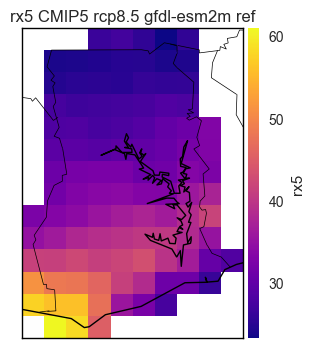

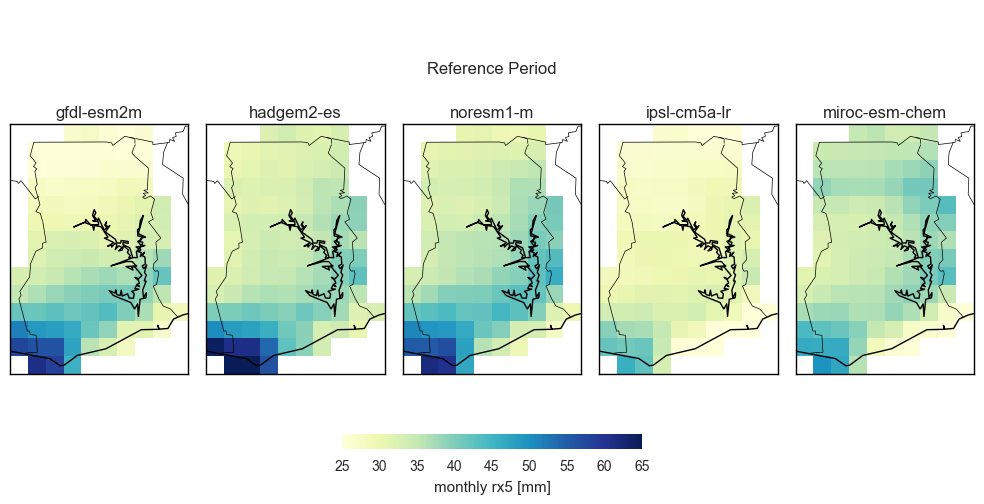

In [14]:
###############
# show maps
###############

# standard plot
GHA.plot_map(meta_data=['rx5','CMIP5','rcp8.5','gfdl-esm2m'],period='ref',source='_data')

# custom plots
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(10,5))
count=0
for model in GHA._data['rx5']['CMIP5']['rcp8.5'].keys():
    im=GHA.plot_map(meta_data=['rx5','CMIP5','rcp8.5',model],period='ref',source='_data',ax=axes[count],title=model,show=False,color_bar=False,color_palette=plt.cm.YlGnBu,color_range=[25,65])
    count+=1

cbar_ax=fig.add_axes([0.1,0.1,0.8,0.2])
cbar_ax.axis('off')
cb=fig.colorbar(im,orientation='horizontal',label='monthly rx5 [mm]')

plt.suptitle('\n\n\nReference Period')
plt.tight_layout()
plt.show()

In [15]:
###############
# load more data 
# since CRU is on a 360x720 grid, the masks from CMIP5 can be used
###############
in_file='/Users/peterpfleiderer/Documents/data/raw/cru/cru_ts3.23.1901.2014.tmp.dat.nc'
GHA.country_zoom(in_file,'tmp',meta_data=['tas','CRU'])
in_file='/Users/peterpfleiderer/Documents/data/raw/cru/cru_ts3.23.1901.2014.pre.dat.nc'
GHA.country_zoom(in_file,'pre',meta_data=['pr','CRU'])


not yearly data! please consider this for the running mean


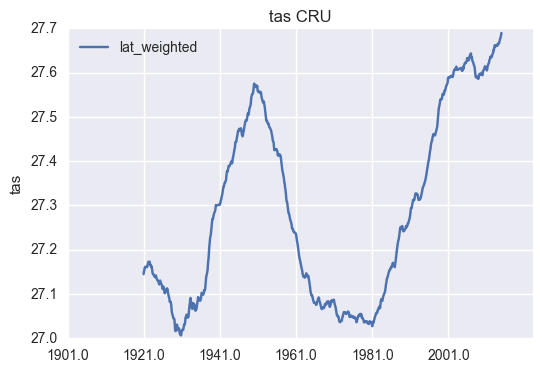

In [16]:
##################
# get country averages
##################
GHA.average()

# standard plot
GHA.plot_transient(meta_data=['tas','CRU'],running_mean=240)

not yearly data! please consider this for the running mean
not yearly data! please consider this for the running mean
not yearly data! please consider this for the running mean
not yearly data! please consider this for the running mean
not yearly data! please consider this for the running mean
not yearly data! please consider this for the running mean


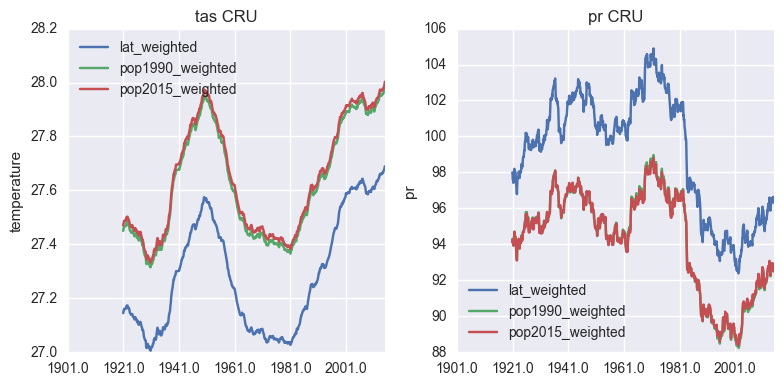

In [17]:
# get country averages for specific weighting styles 
# compute for CRU only

GHA.average(mask_style='lat_weighted',meta_data=[None,'CRU'])
GHA.average(mask_style='pop1990_weighted',meta_data=[None,'CRU'])
GHA.average(mask_style='pop2015_weighted',meta_data=[None,'CRU'])

# plot
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
for mask_style in ['lat_weighted','pop1990_weighted','pop2015_weighted']:
    GHA.plot_transient(meta_data=['tas','CRU'],mask_style=mask_style,ax=axes[0],running_mean=240,show=False,ylabel='temperature')
    
for mask_style in ['lat_weighted','pop1990_weighted','pop2015_weighted']:
    GHA.plot_transient(meta_data=['pr','CRU'],mask_style=mask_style,ax=axes[1],running_mean=240,show=False)

plt.tight_layout()
plt.show()
    

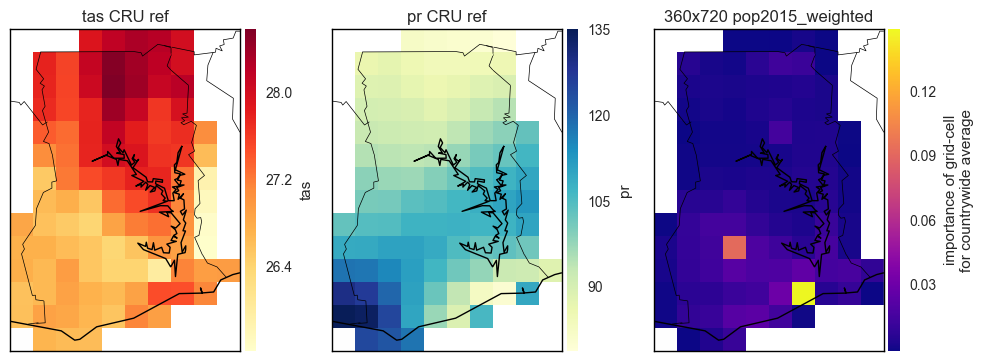

In [29]:
# plot CRU maps
GHA.period_averages(periods={'ref':[1986,2006],'2030s':[2025,2045],'2040s':[2035,2055]})

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,4))
GHA.plot_map(meta_data=['tas','CRU'],period='ref',source='_data',ax=axes[0],show=False,color_palette=plt.cm.YlOrRd)
GHA.plot_map(meta_data=['pr','CRU'],period='ref',source='_data',ax=axes[1],show=False,color_palette=plt.cm.YlGnBu)
GHA.plot_map(meta_data=['360x720','pop2015_weighted'],source='_masks',limits=[-3.5,1.5,4.5,11.5],ax=axes[2],show=False)

plt.tight_layout()
plt.show()


In [ ]:
dimarray
admin region
load data, masking, cdo 
or other way around